In [1]:
import cv2
import numpy as np

In [2]:
# Load the image
# By default, imported images are members of the BGR colorspace.
orange1 = cv2.imread("orange1.jpg")
orange2 = cv2.imread("orange2.jpg")
orange3 = cv2.imread("orange3.jpg")
orange4 = cv2.imread("orange4.jpg")

In [3]:
def plot_histogram_cdf(img):
    
    # Calculate the histogram and cumulative sum
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    
    # Plot the histogram and cumulative sum
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.bar(bins[:-1], hist, width=1, color='gray')
    ax1.set_title('Histogram', )
    ax2.plot(cdf, color='g')
    ax2.set_title('Cumulative Sum')
    plt.tight_layout()
    plt.show()

In [4]:
def BGR_Image_Decomposition(image):
    """
    Decomposes an image into its red, green, and blue channels.

    Args:
        image (numpy.ndarray): Input image as a numpy array.

    Returns:
        tuple: A tuple of numpy arrays representing the blue, green, and red channels of the input image.
    """
    # Split the input image into its blue, green, and red channels
    b, g, r = cv2.split(image)
    
    # Return the blue, green, and red channels as a tuple
    return np.array(b), np.array(g), np.array(r)

In [5]:
def BGR_to_HSV(image):
    """
    Converts an image from the BGR color space to the HSV color space.

    Args:
        image (numpy.ndarray): Input image as a numpy array in the BGR color space.

    Returns:
        tuple: A tuple of numpy arrays representing the hue, saturation, and value channels of the image in the HSV color space.
    """
    # Convert the input image from the BGR color space to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV image into its hue, saturation, and value channels
    h, s, v = cv2.split(hsv_image)

    # Return the hue, saturation, and value channels as a tuple of numpy arrays
    return np.array(h), np.array(s), np.array(v)


In [6]:
def add_gaussian_noise(image, mean, variance):
    """
    Adds Gaussian noise with the specified mean and variance to an input image.

    Args:
        image (numpy.ndarray): Input image as a numpy array.
        mean (float): Mean of the Gaussian distribution.
        variance (float): Variance of the Gaussian distribution.

    Returns:
        numpy.ndarray: Noisy image as a numpy array with the same shape as the input image.
    """
    # Create an array of random Gaussian noise with the specified mean and variance
    noisy_image = image + np.random.normal(mean, np.sqrt(variance), image.shape)

    # Clip the values of the noisy image to the valid range of pixel values (0 to 255 for uint8 images)
    noisy_image = np.clip(noisy_image, 0, 255)

    # Convert the noisy image back to the original data type
    noisy_image = noisy_image.astype(image.dtype)

    return noisy_image


In [7]:
def add_gaussian_noise_rgb(image, mean, variance):
    """
    Adds Gaussian noise with the specified mean and variance to an input RGB image.

    Args:
        image (numpy.ndarray): Input RGB image as a numpy array.
        mean (float): Mean of the Gaussian distribution.
        variance (float): Variance of the Gaussian distribution.

    Returns:
        numpy.ndarray: Noisy RGB image as a numpy array with the same shape as the input image.
    """
    # Split the RGB image into its red, green, and blue channels
    r, g, b = cv2.split(image)

    # Add Gaussian noise to each channel
    r_noisy = add_gaussian_noise(r, mean, variance)
    g_noisy = add_gaussian_noise(g, mean, variance)
    b_noisy = add_gaussian_noise(b, mean, variance)

    # Merge the noisy channels back into an RGB image
    noisy_image = cv2.merge([r_noisy, g_noisy, b_noisy])

    return noisy_image


In [8]:
def bgr_to_gray(image):
    """
    Converts a BGR image to grayscale.

    Args:
        image (numpy.ndarray): Input image as a numpy array.

    Returns:
        numpy.ndarray: Grayscale image as a numpy array.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [9]:
def create_salt_and_pepper_noise_hsv(image, density):
    """
    Creates salt and pepper noise in the hue component of an input image in the HSV color space.

    Args:
        image (numpy.ndarray): Input image as a numpy array in the BGR color space.
        density (float): Density of the salt and pepper noise.

    Returns:
        numpy.ndarray: Noisy image as a numpy array with the same shape as the input image.
    """
    # Convert the input image from the BGR color space to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV image into its hue, saturation, and value channels
    h, s, v = cv2.split(hsv_image)

    # Create a random array of the same shape as the hue channel
    rand = np.random.rand(*h.shape)

    # Add salt and pepper noise to the hue channel
    v[rand < density/2] = 0
    v[rand > 1 - density/2] = 179

    # Merge the noisy hue channel back into the HSV image
    noisy_hsv_image = cv2.merge([h, s, v])

    # Convert the noisy HSV image back to the BGR color space
    noisy_image = cv2.cvtColor(noisy_hsv_image, cv2.COLOR_HSV2BGR)

    return noisy_image


In [37]:
def pepper_noise_estimator(img):
    count = np.count_nonzero(np.logical_or(img < 3,img > 253))
    # Return density
    return count / img.size

In [11]:
def estimate_gaussian_noise_variance(image):
    """
    Estimates the variance of Gaussian noise in an input grayscale image.

    Args:
        image (numpy.ndarray): Input image as a numpy array in grayscale.

    Returns:
        float: Variance of Gaussian noise in the input image.
    """
    # Compute the absolute difference between adjacent pixels in the image
    diff_image = np.abs(np.diff(image))

    # Compute the variance of the differences
    variance = np.var(diff_image)

    return variance

In [12]:
 def geometric_mean(arr):
        return np.power(np.prod(arr), 1.0 / len(arr))

In [14]:
from scipy.ndimage import generic_filter

def geometric_mean_filter(image, function = [geometric_mean], window_size = 3):

    # Apply the geometric mean filter to the image using a moving window
    filtered_image = generic_filter(image, geometric_mean, size=window_size)

    return filtered_image


In [15]:
def tiled_rgb_function_filter(image, function = [geometric_mean], color_channel='rgb', window_size=3):

    # Define the mapping of the color channel to its index
    channel_map = {'r': 0, 'g': 1, 'b': 2}

    # Determine which color channel to apply the filter on
    channel_index = channel_map[color_channel]

    # Extract the specified color channel
    channel_image = image[..., channel_index]

    # Apply the geometric mean filter to the color channel using a moving window
    filtered_channel = generic_filter(channel_image, geometric_mean, size=window_size)

    # Replace the filtered channel in the original image
    filtered_image = image.copy()
    filtered_image[..., channel_index] = filtered_channel

    return filtered_image

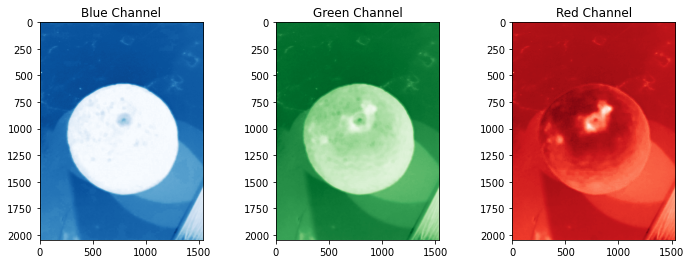

In [16]:
import matplotlib.pyplot as plt

# Call the BGR_Image_Decomposition function to get the blue, green, and red channels
blue, green, red = BGR_Image_Decomposition(orange1)

# Set a larger size for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the blue, green, and red channels as separate images using Matplotlib
axes[0].imshow(blue, cmap='Blues')
axes[0].set_title('Blue Channel')

axes[1].imshow(green, cmap='Greens')
axes[1].set_title('Green Channel')

axes[2].imshow(red, cmap='Reds')
axes[2].set_title('Red Channel')

plt.show()

Image shape: (2048, 1536)


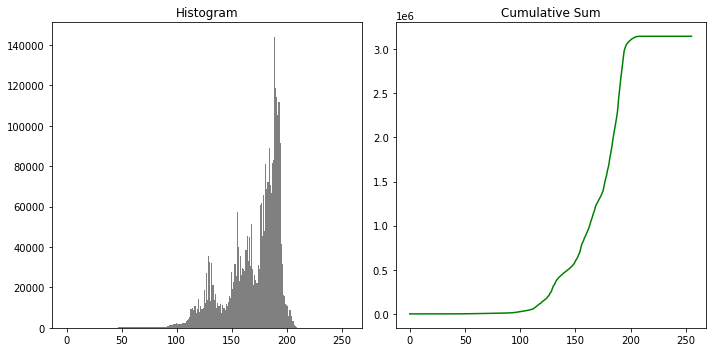

In [17]:
def print_image_shape(image):
    print("Image shape:", image.shape)

print_image_shape(green)
plot_histogram_cdf(red)

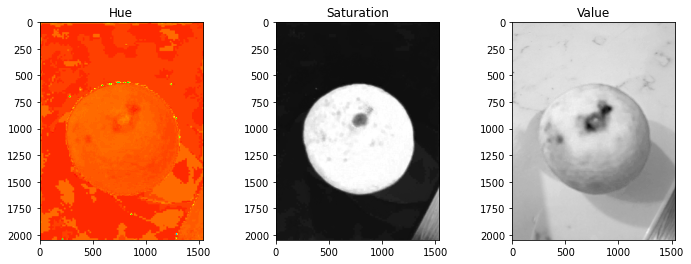

In [18]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(orange1, cv2.COLOR_BGR2HSV)

# Split the HSV image into its hue, saturation, and value channels
h, s, v = cv2.split(hsv_image)

# Create a figure with subplots for each channel
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the hue, saturation, and value channels using Matplotlib
axes[0].imshow(h, cmap='hsv')
axes[0].set_title('Hue')

axes[1].imshow(s, cmap='gray')
axes[1].set_title('Saturation')

axes[2].imshow(v, cmap='gray')
axes[2].set_title('Value')

plt.show()

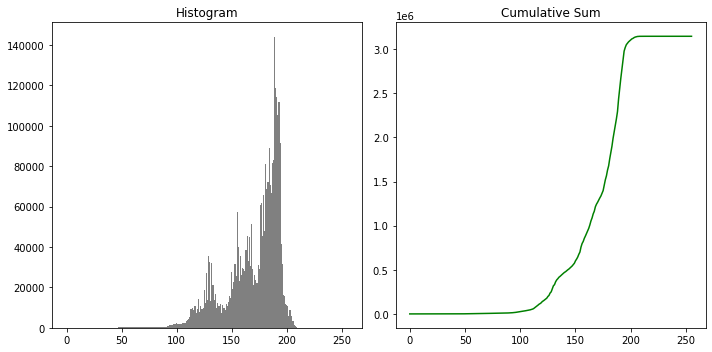

In [19]:
plot_histogram_cdf(v)

Text(0.5, 1.0, 'Grayscale')

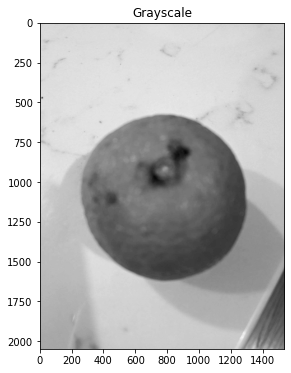

In [20]:
gray_image = cv2.cvtColor(orange1, cv2.COLOR_BGR2GRAY)

# Create a figure with a single subplot for the grayscale image
fig, ax = plt.subplots(figsize=(8, 6))

# Display the hue, saturation, and value channels using Matplotlib
ax.imshow(gray_image, cmap='gray')
ax.set_title('Grayscale')

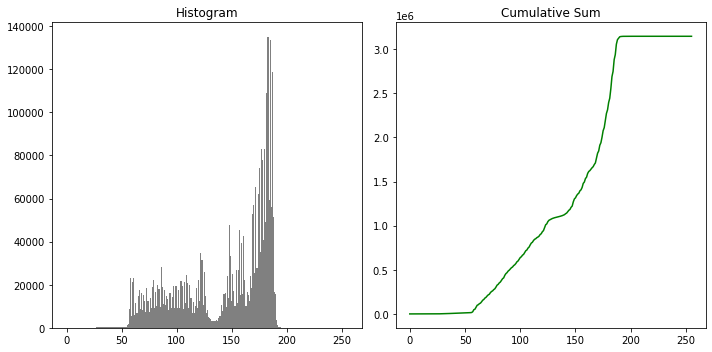

In [21]:
plot_histogram_cdf(gray_image)

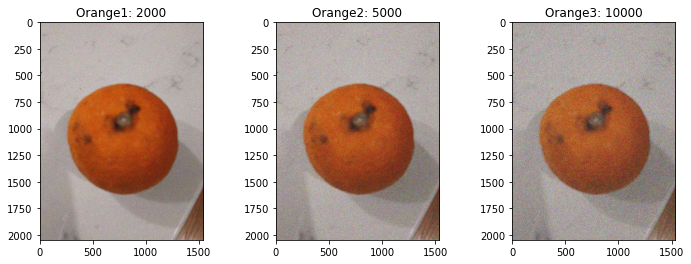

In [53]:
# Gaussian noise application

# Process orange1, orange2, and orange3
gimage1 = add_gaussian_noise_rgb(orange1, 0, 2000)
gimage2 = add_gaussian_noise_rgb(orange1, 0, 5000)
gimage3 = add_gaussian_noise_rgb(orange1, 0, 10000)

# Create a figure with subplots for each channel
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the hue, saturation, and value channels using Matplotlib
axes[0].imshow(cv2.cvtColor(gimage1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Orange1: 2000')

axes[1].imshow(cv2.cvtColor(gimage2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Orange2: 5000')

axes[2].imshow(cv2.cvtColor(gimage3, cv2.COLOR_BGR2RGB))
axes[2].set_title('Orange3: 10000')

plt.show()

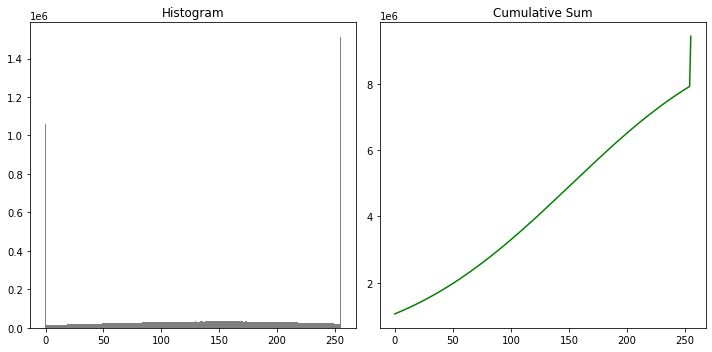

In [54]:
plot_histogram_cdf(image3)

In [63]:
estimate_gaussian_noise_variance(gimage3)

6040.544999945981

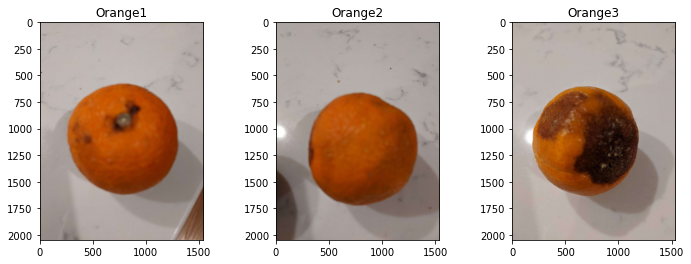

In [25]:
# Create a figure with subplots for each channel
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the hue, saturation, and value channels using Matplotlib
axes[0].imshow(cv2.cvtColor(orange1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Orange1')

axes[1].imshow(cv2.cvtColor(orange2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Orange2')

axes[2].imshow(cv2.cvtColor(orange3, cv2.COLOR_BGR2RGB))
axes[2].set_title('Orange3')

plt.show()

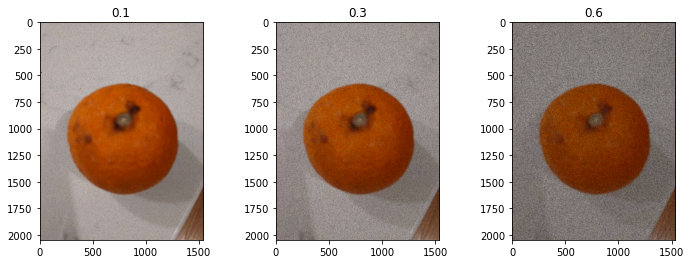

In [66]:
# Gaussian noise application

# Process orange1, orange2, and orange3
image1 = create_salt_and_pepper_noise_hsv(orange1, 0.1)
image2 = create_salt_and_pepper_noise_hsv(orange1, 0.3)
image3 = create_salt_and_pepper_noise_hsv(orange1, 0.6)

# Create a figure with subplots for each channel
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the hue, saturation, and value channels using Matplotlib
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('0.1')

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('0.3')

axes[2].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
axes[2].set_title('0.6')

plt.show()

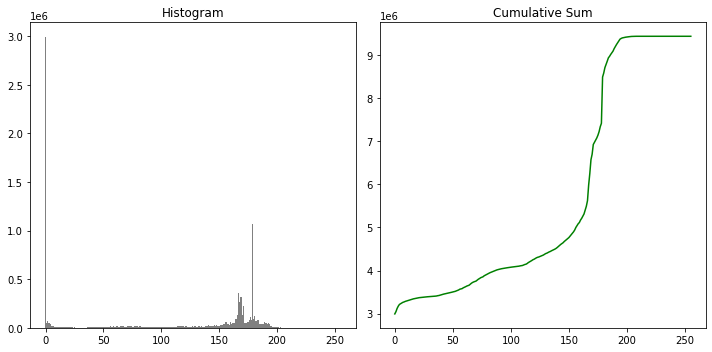

In [27]:
plot_histogram_cdf(image3)

In [69]:
pepper_noise_estimator(image3)

0.32991578843858504

Text(0.5, 1.0, 'Mean')

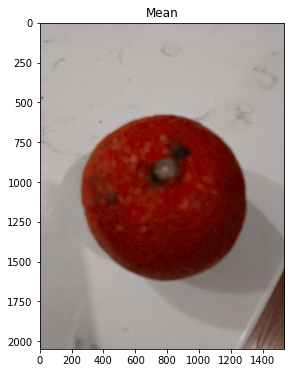

In [29]:
# Create a figure with a single subplot for the grayscale image
fig, ax = plt.subplots(figsize=(8, 6))

def array_mean(arr):
    return np.mean(arr)

# Display the hue, saturation, and value channels using Matplotlib
ax.imshow(cv2.cvtColor(geometric_mean_filter(orange1, array_mean, 2), cv2.COLOR_BGR2RGB))
ax.set_title('Mean')

In [30]:
def geometric_mean_filter(image, window_size):
    """
    Applies the geometric mean of a moving window to the central pixel.

    Args:
        image (numpy.ndarray): Input image as a 2D numpy array.
        window_size (int): Size of the moving window.

    Returns:
        numpy.ndarray: A 2D numpy array containing the filtered image.
    """
    # Define a local function to calculate the geometric mean of a 1D array
    def geometric_mean(arr):
        return np.power(np.prod(arr), 1.0 / len(arr))

    # Pad the image with zeros to handle edges
    pad_size = window_size // 2
    padded_image = np.pad(image, pad_size, mode='constant')

    # Generate a strided array view of the image using np.lib.stride_tricks.as_strided
    height, width = image.shape
    height_stride, width_stride = padded_image.strides
    window_shape = (window_size, window_size)
    shape = (height - window_size + 1, width - window_size + 1, window_size, window_size)
    strides = (height_stride * window_size, width_stride, height_stride, width_stride)
    strided_image = np.lib.stride_tricks.as_strided(padded_image, shape=shape, strides=strides)

    # Calculate the geometric mean of each window and store in output array
    filtered_image = np.apply_along_axis(geometric_mean, axis=(2,3), arr=strided_image)

    return filtered_image


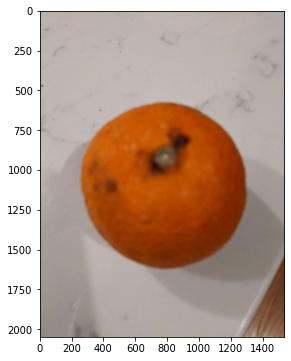

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

img = tiled_rgb_function_filter(orange1, function = [geometric_mean], color_channel='r', window_size=5)

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

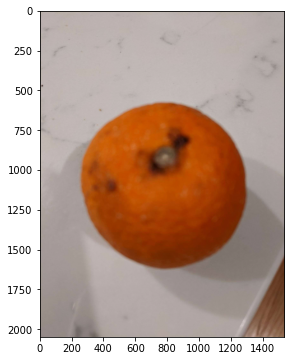

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

img = tiled_rgb_function_filter(orange1, function = [geometric_mean], color_channel='g', window_size=3)

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

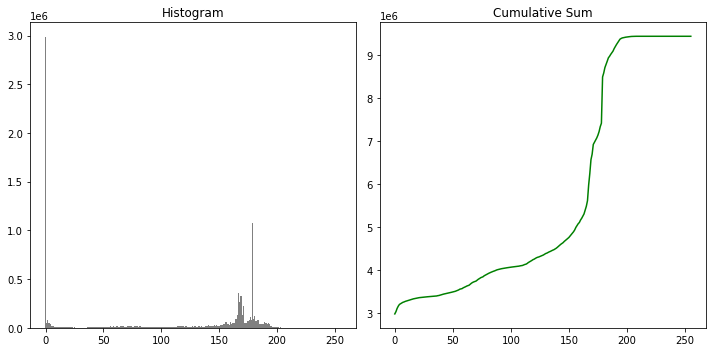

In [70]:
plot_histogram_cdf(image3)

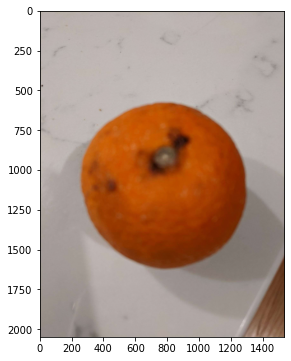

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

img = tiled_rgb_function_filter(orange1, function = [geometric_mean], color_channel='b', window_size=3)

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

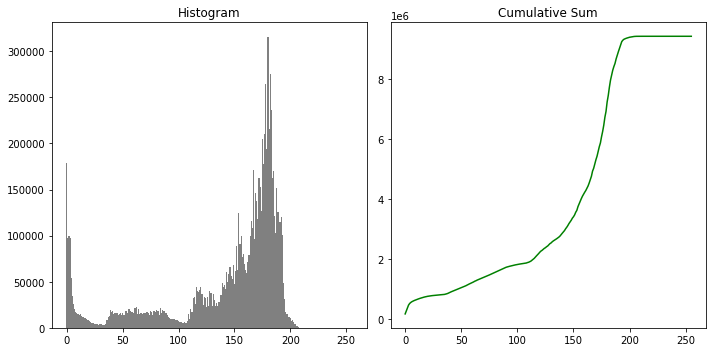

In [34]:
plot_histogram_cdf(img)

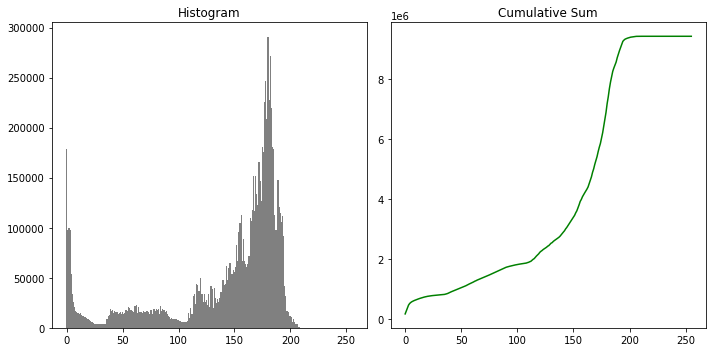

In [35]:
plot_histogram_cdf(orange1)

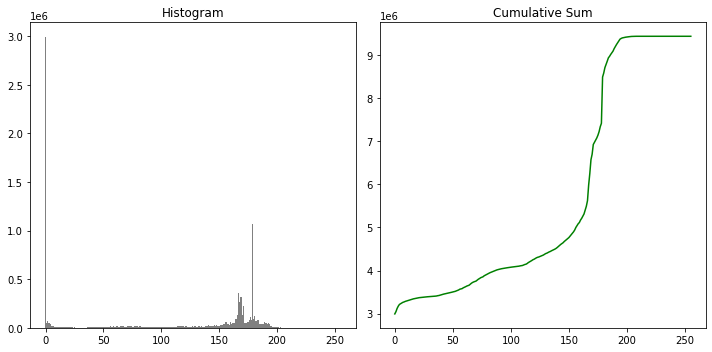

In [36]:
plot_histogram_cdf(image3)